In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('2023_24.csv',sep=",")

In [3]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.465753,1.191781,0.652968,0.538813,13.894977,10.890411,4.885845,3.771689,13.191781,13.315068,...,1.907671,-0.358447,1.951644,1.961826,1.960000,1.970046,2.011918,2.015753,1.928174,1.931461
std,1.260721,1.169068,0.833984,0.755470,5.081259,4.587263,2.564888,2.352614,3.787925,4.503444,...,0.432724,0.733728,0.107136,0.101734,0.102867,0.105415,0.105491,0.105612,0.092540,0.093958
min,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,4.000000,...,1.270000,-2.500000,1.630000,1.730000,1.670000,1.770000,1.800000,1.790000,1.670000,1.750000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,11.000000,10.000000,...,1.595000,-0.750000,1.880000,1.900000,1.880000,1.890000,1.930000,1.940000,1.850000,1.860000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,4.000000,3.000000,13.000000,13.000000,...,1.800000,-0.250000,1.960000,1.960000,1.960000,1.960000,2.020000,2.000000,1.930000,1.920000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,16.000000,16.000000,...,2.140000,0.000000,2.030000,2.040000,2.030000,2.040000,2.090000,2.095000,2.000000,2.000000
max,5.000000,7.000000,4.000000,3.000000,31.000000,29.000000,12.000000,12.000000,25.000000,29.000000,...,3.690000,1.250000,2.180000,2.250000,2.200000,2.340000,2.440000,2.380000,2.150000,2.250000


En primer lugar eliminaremos las columnas correspondientes a datos asociados a casas de apuestas, los cuales, en principio, no utilizaremos para nuestor estudio.


In [4]:
data = data.drop(data.columns[range(23,105)],axis=1)

In [5]:
data

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,SP1,11/08/2023,18:30,Almeria,Vallecano,0,2,A,0,2,...,5,4,16,25,8,3,1,3,0,0
1,SP1,11/08/2023,21:00,Sevilla,Valencia,1,2,A,0,0,...,3,3,15,17,8,1,3,2,1,0
2,SP1,12/08/2023,16:00,Sociedad,Girona,1,1,D,1,0,...,2,1,22,9,4,1,2,5,0,0
3,SP1,12/08/2023,18:30,Las Palmas,Mallorca,1,1,D,1,0,...,2,2,11,21,3,6,3,2,0,0
4,SP1,12/08/2023,20:30,Ath Bilbao,Real Madrid,0,2,A,0,2,...,1,8,18,6,7,5,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,SP1,28/01/2024,17:30,Sevilla,Osasuna,1,1,D,1,0,...,5,4,19,13,2,4,3,0,1,0
215,SP1,28/01/2024,20:00,Ath Madrid,Valencia,2,0,H,1,0,...,8,3,9,9,3,6,2,0,0,0
216,SP1,29/01/2024,20:00,Getafe,Granada,2,0,H,2,0,...,4,3,17,11,4,3,2,1,0,0
217,SP1,31/01/2024,18:00,Barcelona,Osasuna,1,0,H,0,0,...,4,1,9,12,6,6,1,2,0,1


En cuanto a las columnas correspondientes a equipos locales y visitantes, trabajar con los propios nombres de los equipos puede ser dificil de manear. Por ello se plantea asociar cada uno de los clubes a un identificador.


In [6]:
equipos = data['HomeTeam'].unique()
equipos

array(['Almeria', 'Sevilla', 'Sociedad', 'Las Palmas', 'Ath Bilbao',
       'Celta', 'Villarreal', 'Getafe', 'Cadiz', 'Ath Madrid', 'Mallorca',
       'Valencia', 'Osasuna', 'Girona', 'Barcelona', 'Betis', 'Alaves',
       'Granada', 'Vallecano', 'Real Madrid'], dtype=object)

In [7]:
data['HomeTeam'] = data['HomeTeam'].replace({
    'Almeria': 'ID020',
    'Sevilla': 'ID016',
    'Sociedad': 'ID006',
    'Las Palmas': 'ID009',
    'Ath Bilbao': 'ID004',
    'Celta': 'ID017',
    'Villarreal': 'ID014',
    'Getafe': 'ID010',
    'Cadiz': 'ID018',
    'Ath Madrid': 'ID003',
    'Mallorca': 'ID015',
    'Valencia': 'ID008',
    'Osasuna': 'ID012',
    'Girona': 'ID001',
    'Barcelona': 'ID005',
    'Betis': 'ID007',
    'Alaves': 'ID011',
    'Granada': 'ID019',
    'Vallecano': 'ID013',
    'Real Madrid': 'ID002'
    
})

In [8]:
data['AwayTeam'] = data['AwayTeam'].replace({
    'Almeria': 'ID020',
    'Sevilla': 'ID016',
    'Sociedad': 'ID006',
    'Las Palmas': 'ID009',
    'Ath Bilbao': 'ID004',
    'Celta': 'ID017',
    'Villarreal': 'ID014',
    'Getafe': 'ID010',
    'Cadiz': 'ID018',
    'Ath Madrid': 'ID003',
    'Mallorca': 'ID015',
    'Valencia': 'ID008',
    'Osasuna': 'ID012',
    'Girona': 'ID001',
    'Barcelona': 'ID005',
    'Betis': 'ID007',
    'Alaves': 'ID011',
    'Granada': 'ID019',
    'Vallecano': 'ID013',
    'Real Madrid': 'ID002'
    
})

In [9]:
data.head

<bound method NDFrame.head of      Div        Date   Time HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0    SP1  11/08/2023  18:30    ID020    ID013     0     2   A     0     2   
1    SP1  11/08/2023  21:00    ID016    ID008     1     2   A     0     0   
2    SP1  12/08/2023  16:00    ID006    ID001     1     1   D     1     0   
3    SP1  12/08/2023  18:30    ID009    ID015     1     1   D     1     0   
4    SP1  12/08/2023  20:30    ID004    ID002     0     2   A     0     2   
..   ...         ...    ...      ...      ...   ...   ...  ..   ...   ...   
214  SP1  28/01/2024  17:30    ID016    ID012     1     1   D     1     0   
215  SP1  28/01/2024  20:00    ID003    ID008     2     0   H     1     0   
216  SP1  29/01/2024  20:00    ID010    ID019     2     0   H     2     0   
217  SP1  31/01/2024  18:00    ID005    ID012     1     0   H     0     0   
218  SP1  31/01/2024  20:00    ID003    ID013     2     1   H     1     1   

     ... HST  AST  HF  AF  HC  AC  HY  AY  HR

### **DIFERENCIA DE GOLES (GOAL_DIFF)**

Procedemos a crear el dataframe donde albergaremos la diferencia de golas por equipo y jornada.

In [10]:
goal_diff = np.full((20, 38), np.nan)
columnas =  [f'Jornada_{i}' for i in range(1, 39)]
filas = data['HomeTeam'].unique()
goal_diff = pd.DataFrame(goal_diff, columns=columnas)
filas = sorted(filas)
goal_diff.index = filas
goal_diff

,Jornada_1,Jornada_2,Jornada_3,Jornada_4,Jornada_5,Jornada_6,Jornada_7,Jornada_8,Jornada_9,Jornada_10,...,Jornada_29,Jornada_30,Jornada_31,Jornada_32,Jornada_33,Jornada_34,Jornada_35,Jornada_36,Jornada_37,Jornada_38
ID001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for j in filas:
    t=1
    for i in range(data.shape[0] - 1, -1, -1):
        if j == data.iloc[i, 3]:
            tmp_diff = data.iloc[i, 5] - data.iloc[i, 6]
            if pd.isna(goal_diff.loc[j, 'Jornada_1']):
                goal_diff.loc[j, 'Jornada_1'] = tmp_diff
                t+=1
            else:
                goal_diff.loc[j, f'Jornada_{t}'] = goal_diff.loc[j, f'Jornada_{t-1}'] + tmp_diff
                t += 1  

        elif j == data.iloc[i, 4]:
            tmp_diff = data.iloc[i, 6] - data.iloc[i, 5]
            if pd.isna(goal_diff.loc[j, 'Jornada_1']):
                goal_diff.loc[j, 'Jornada_1'] = tmp_diff
                t+=1
            else:
                goal_diff.loc[j, f'Jornada_{t}'] = goal_diff.loc[j, f'Jornada_{t-1}'] + tmp_diff
                t += 1  


In [15]:
goal_diff.iloc[:,0:22]

,Jornada_1,Jornada_2,Jornada_3,Jornada_4,Jornada_5,Jornada_6,Jornada_7,Jornada_8,Jornada_9,Jornada_10,...,Jornada_13,Jornada_14,Jornada_15,Jornada_16,Jornada_17,Jornada_18,Jornada_19,Jornada_20,Jornada_21,Jornada_22
ID001,0.032258,0.161290,0.161290,0.193548,0.193548,0.290323,0.354839,0.387097,0.387097,0.419355,...,0.612903,0.645161,0.548387,0.580645,0.645161,0.709677,0.741935,0.774194,0.870968,0.870968
ID002,0.032258,0.064516,0.096774,0.129032,0.225806,0.225806,0.290323,0.387097,0.516129,0.516129,...,0.677419,0.774194,0.838710,0.774194,0.806452,0.838710,0.870968,0.935484,1.000000,NaN
ID003,0.032258,0.096774,0.129032,0.096774,0.129032,0.129032,0.064516,0.096774,0.064516,0.096774,...,0.161290,0.258065,0.290323,0.322581,0.387097,0.451613,0.354839,0.580645,0.580645,0.645161
ID004,0.000000,-0.032258,0.000000,0.064516,0.096774,0.161290,0.161290,0.290323,0.290323,0.322581,...,0.322581,0.419355,0.322581,0.322581,0.387097,0.483871,0.483871,0.548387,0.612903,0.548387
ID005,0.032258,-0.032258,0.032258,0.064516,0.096774,0.096774,0.032258,0.064516,0.064516,0.096774,...,0.129032,0.129032,0.161290,0.161290,0.193548,0.354839,0.387097,0.419355,0.483871,0.483871
ID006,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.096774,0.096774,0.129032,0.193548,...,0.193548,0.161290,0.258065,0.290323,0.322581,0.290323,0.354839,0.354839,0.354839,0.354839
ID007,0.032258,-0.032258,0.000000,-0.032258,-0.032258,-0.032258,-0.032258,-0.032258,0.000000,0.000000,...,0.096774,0.096774,0.193548,0.193548,0.193548,0.032258,0.064516,0.000000,0.000000,0.032258
ID008,-0.064516,-0.032258,0.064516,0.129032,0.161290,0.161290,0.129032,0.096774,0.096774,-0.032258,...,0.064516,0.064516,-0.032258,-0.064516,-0.064516,0.032258,0.000000,-0.032258,0.000000,0.032258
ID009,-0.032258,0.032258,0.129032,0.096774,0.064516,0.064516,0.096774,0.161290,0.129032,0.129032,...,0.161290,0.193548,0.225806,0.161290,0.193548,0.161290,0.129032,0.129032,0.096774,0.096774
ID010,0.064516,0.032258,-0.032258,-0.032258,0.064516,0.096774,0.032258,0.064516,0.064516,0.096774,...,0.096774,0.096774,0.096774,0.064516,0.096774,0.064516,0.096774,0.000000,0.000000,NaN


In [13]:
goal_diff = goal_diff / goal_diff.max().max()

In [14]:
goal_diff

,Jornada_1,Jornada_2,Jornada_3,Jornada_4,Jornada_5,Jornada_6,Jornada_7,Jornada_8,Jornada_9,Jornada_10,...,Jornada_29,Jornada_30,Jornada_31,Jornada_32,Jornada_33,Jornada_34,Jornada_35,Jornada_36,Jornada_37,Jornada_38
ID001,0.032258,0.161290,0.161290,0.193548,0.193548,0.290323,0.354839,0.387097,0.387097,0.419355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID002,0.032258,0.064516,0.096774,0.129032,0.225806,0.225806,0.290323,0.387097,0.516129,0.516129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID003,0.032258,0.096774,0.129032,0.096774,0.129032,0.129032,0.064516,0.096774,0.064516,0.096774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID004,0.000000,-0.032258,0.000000,0.064516,0.096774,0.161290,0.161290,0.290323,0.290323,0.322581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID005,0.032258,-0.032258,0.032258,0.064516,0.096774,0.096774,0.032258,0.064516,0.064516,0.096774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID006,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.096774,0.096774,0.129032,0.193548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID007,0.032258,-0.032258,0.000000,-0.032258,-0.032258,-0.032258,-0.032258,-0.032258,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID008,-0.064516,-0.032258,0.064516,0.129032,0.161290,0.161290,0.129032,0.096774,0.096774,-0.032258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID009,-0.032258,0.032258,0.129032,0.096774,0.064516,0.064516,0.096774,0.161290,0.129032,0.129032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID010,0.064516,0.032258,-0.032258,-0.032258,0.064516,0.096774,0.032258,0.064516,0.064516,0.096774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


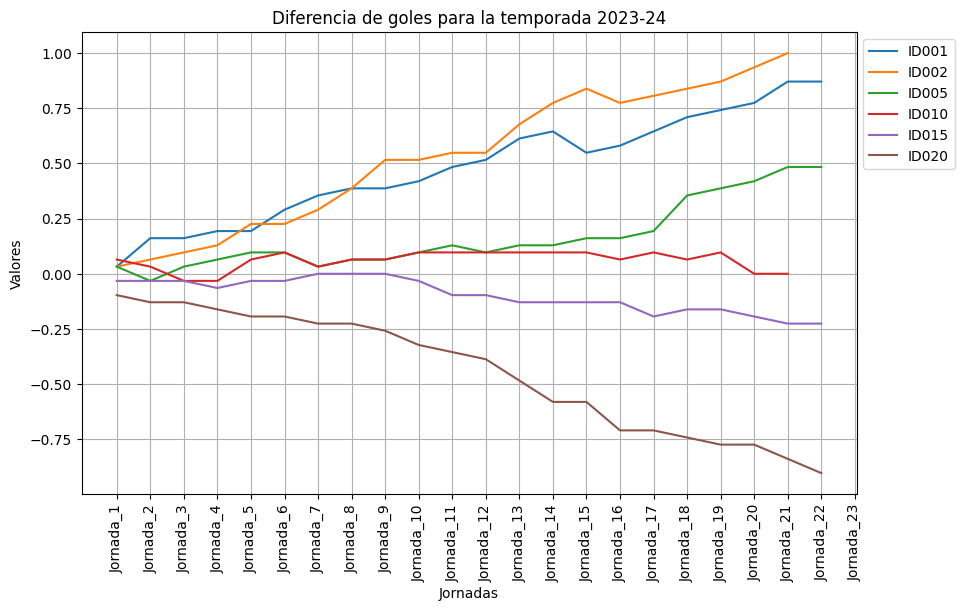

In [17]:


selected_rows = ['ID001', 'ID002','ID005', 'ID010', 'ID015', 'ID020']

plt.figure(figsize=(10, 6))
for index, row in goal_diff.loc[selected_rows].iterrows():
    plt.plot(row, label=index)

plt.xlabel('Jornadas')
plt.ylabel('Valores')
plt.title('Diferencia de goles para la temporada 2023-24')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)


plt.xticks(rotation=90)

plt.show()


### **DIFERENCIA DE CORNERS (CORNS_DIFF)**

In [18]:
corns_diff = np.full((20, 38), np.nan)
columnas =  [f'Jornada_{i}' for i in range(1, 39)]
filas = data['HomeTeam'].unique()
corns_diff = pd.DataFrame(corns_diff, columns=columnas)
filas = sorted(filas)
corns_diff.index = filas
corns_diff

,Jornada_1,Jornada_2,Jornada_3,Jornada_4,Jornada_5,Jornada_6,Jornada_7,Jornada_8,Jornada_9,Jornada_10,...,Jornada_29,Jornada_30,Jornada_31,Jornada_32,Jornada_33,Jornada_34,Jornada_35,Jornada_36,Jornada_37,Jornada_38
ID001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
for j in filas:
    t=1
    for i in range(data.shape[0] - 1, -1, -1):
        if j == data.iloc[i, 3]:
            tmp_diff = data.iloc[i, 17] - data.iloc[i, 18]
            if pd.isna(corns_diff.loc[j, 'Jornada_1']):
                corns_diff.loc[j, 'Jornada_1'] = tmp_diff
                t+=1
            else:
                corns_diff.loc[j, f'Jornada_{t}'] = corns_diff.loc[j, f'Jornada_{t-1}'] + tmp_diff
                t += 1  

        elif j == data.iloc[i, 4]:
            tmp_diff = data.iloc[i, 18] - data.iloc[i, 17]
            if pd.isna(corns_diff.loc[j, 'Jornada_1']):
                corns_diff.loc[j, 'Jornada_1'] = tmp_diff
                t+=1
            else:
                corns_diff.loc[j, f'Jornada_{t}'] = corns_diff.loc[j, f'Jornada_{t-1}'] + tmp_diff
                t += 1  


In [34]:
corns_diff = corns_diff / corns_diff.max().max()

In [35]:
corns_diff

,Jornada_1,Jornada_2,Jornada_3,Jornada_4,Jornada_5,Jornada_6,Jornada_7,Jornada_8,Jornada_9,Jornada_10,...,Jornada_29,Jornada_30,Jornada_31,Jornada_32,Jornada_33,Jornada_34,Jornada_35,Jornada_36,Jornada_37,Jornada_38
ID001,0.029851,0.014925,0.000000,-0.014925,-0.029851,-0.014925,-0.089552,-0.074627,-0.134328,-0.208955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID002,0.074627,0.119403,0.134328,0.134328,0.298507,0.268657,0.358209,0.358209,0.358209,0.507463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID003,-0.014925,-0.059701,-0.119403,-0.104478,-0.089552,-0.253731,-0.194030,-0.373134,-0.447761,-0.388060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID004,0.029851,0.000000,0.000000,-0.014925,0.029851,-0.029851,0.074627,0.149254,0.208955,0.283582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID005,0.000000,0.149254,0.164179,0.238806,0.417910,0.447761,0.522388,0.597015,0.641791,0.656716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID006,0.000000,-0.044776,-0.044776,-0.014925,-0.044776,-0.104478,-0.134328,-0.029851,-0.029851,-0.029851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID007,-0.014925,-0.029851,0.149254,0.134328,0.149254,0.208955,0.238806,0.268657,0.283582,0.223881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID008,0.044776,0.074627,0.044776,0.059701,-0.044776,-0.074627,-0.179104,-0.194030,-0.223881,-0.223881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID009,-0.074627,-0.253731,-0.283582,-0.358209,-0.402985,-0.432836,-0.567164,-0.567164,-0.582090,-0.656716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID010,0.014925,0.059701,0.044776,0.208955,0.179104,0.283582,0.283582,0.238806,0.268657,0.313433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


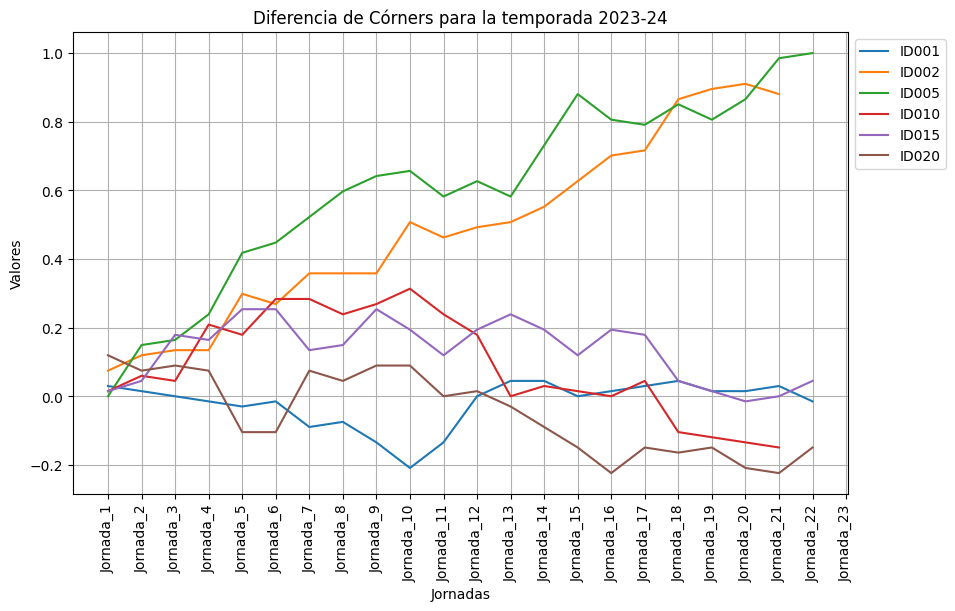

In [37]:
selected_rows = ['ID001', 'ID002','ID005', 'ID010', 'ID015', 'ID020']

plt.figure(figsize=(10, 6))
for index, row in corns_diff.loc[selected_rows].iterrows():
    plt.plot(row, label=index)

plt.xlabel('Jornadas')
plt.ylabel('Valores')
plt.title('Diferencia de Córners para la temporada 2023-24')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)


plt.xticks(rotation=90)

plt.show()

### **DIFERENCIA DE TIROS A PUERTA (SHOOTS_DIFF)**

In [40]:
shoots_diff = np.full((20, 38), np.nan)
columnas =  [f'Jornada_{i}' for i in range(1, 39)]
filas = data['HomeTeam'].unique()
shoots_diff = pd.DataFrame(shoots_diff, columns=columnas)
filas = sorted(filas)
shoots_diff.index = filas
shoots_diff

,Jornada_1,Jornada_2,Jornada_3,Jornada_4,Jornada_5,Jornada_6,Jornada_7,Jornada_8,Jornada_9,Jornada_10,...,Jornada_29,Jornada_30,Jornada_31,Jornada_32,Jornada_33,Jornada_34,Jornada_35,Jornada_36,Jornada_37,Jornada_38
ID001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
for j in filas:
    t=1
    for i in range(data.shape[0] - 1, -1, -1):
        if j == data.iloc[i, 3]:
            tmp_diff = data.iloc[i, 13] - data.iloc[i, 14]
            if pd.isna(shoots_diff.loc[j, 'Jornada_1']):
                shoots_diff.loc[j, 'Jornada_1'] = tmp_diff
                t+=1
            else:
                shoots_diff.loc[j, f'Jornada_{t}'] = shoots_diff.loc[j, f'Jornada_{t-1}'] + tmp_diff
                t += 1  

        elif j == data.iloc[i, 4]:
            tmp_diff = data.iloc[i, 14] - data.iloc[i, 13]
            if pd.isna(shoots_diff.loc[j, 'Jornada_1']):
                shoots_diff.loc[j, 'Jornada_1'] = tmp_diff
                t+=1
            else:
                shoots_diff.loc[j, f'Jornada_{t}'] = shoots_diff.loc[j, f'Jornada_{t-1}'] + tmp_diff
                t += 1  


In [47]:
shoots_diff = shoots_diff/ shoots_diff.max().max()

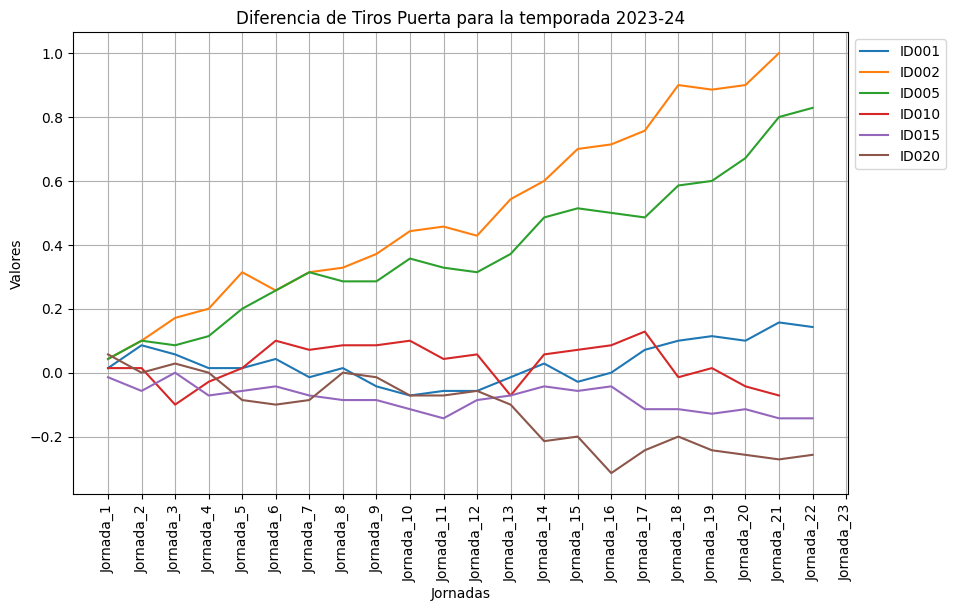

In [50]:
selected_rows = ['ID001', 'ID002','ID005', 'ID010', 'ID015', 'ID020']

plt.figure(figsize=(10, 6))
for index, row in shoots_diff.loc[selected_rows].iterrows():
    plt.plot(row, label=index)

plt.xlabel('Jornadas')
plt.ylabel('Valores')
plt.title('Diferencia de Tiros Puerta para la temporada 2023-24')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)


plt.xticks(rotation=90)

plt.show()

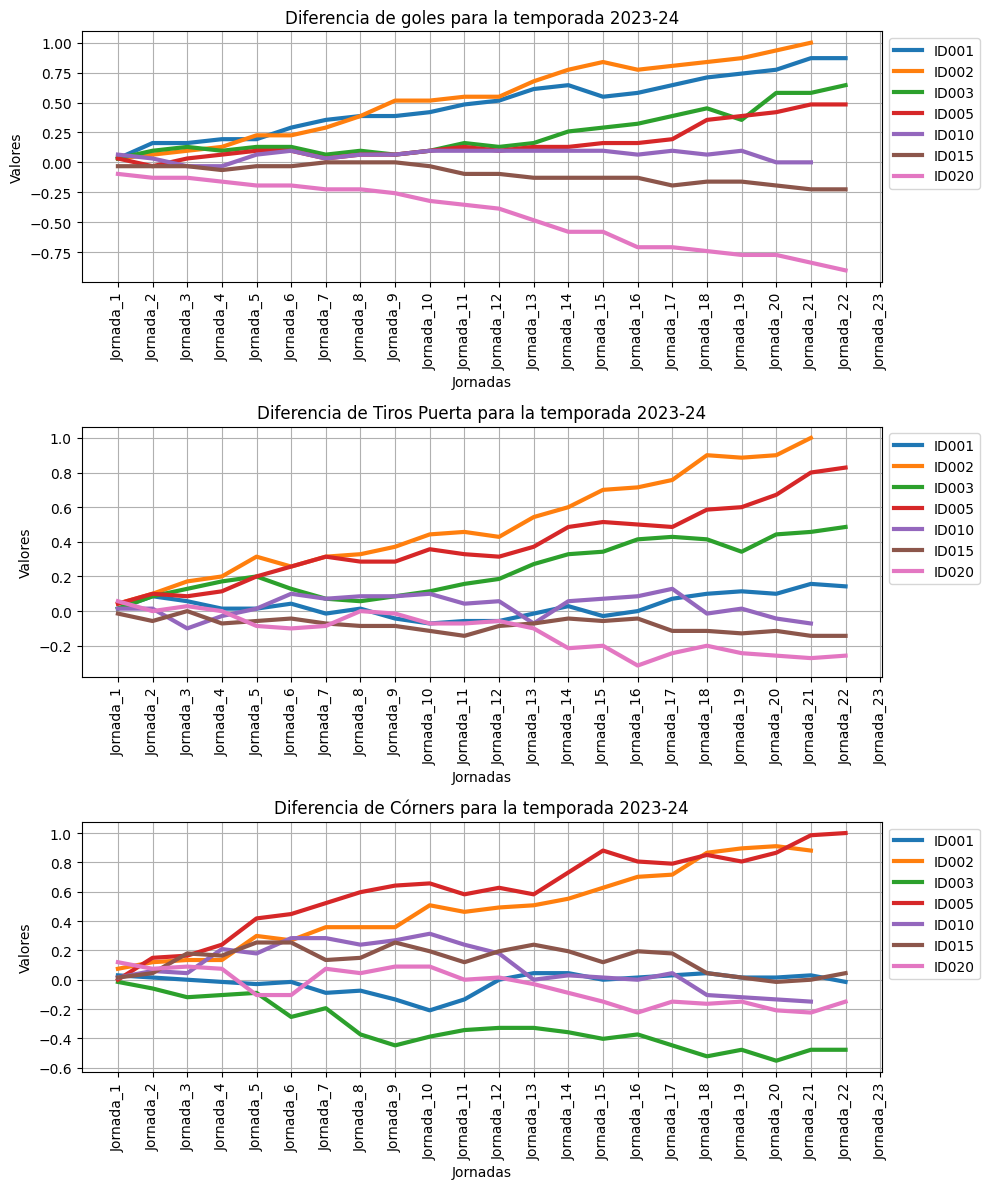

In [58]:

selected_rows = ['ID001', 'ID002','ID003' ,'ID005', 'ID010', 'ID015', 'ID020']

# Crear subgráficos
fig, (ax3,ax1, ax2) = plt.subplots(3, 1, figsize=(10, 12))


for index, row in goal_diff.loc[selected_rows].iterrows():
    ax3.plot(row, label=index,linewidth=3)

ax3.set_xlabel('Jornadas')
ax3.set_ylabel('Valores')
ax3.set_title('Diferencia de goles para la temporada 2023-24')
ax3.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax3.grid(True)
ax3.tick_params(axis='x', rotation=90)



# Gráfico de Diferencia de Tiros Puerta
for index, row in shoots_diff.loc[selected_rows].iterrows():
    ax1.plot(row, label=index, linewidth=3)  # Ajusta el ancho de la línea aquí

ax1.set_xlabel('Jornadas')
ax1.set_ylabel('Valores')
ax1.set_title('Diferencia de Tiros Puerta para la temporada 2023-24')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.grid(True)
ax1.tick_params(axis='x', rotation=90)

# Gráfico de Diferencia de Córners
for index, row in corns_diff.loc[selected_rows].iterrows():
    ax2.plot(row, label=index, linewidth=3)  # Ajusta el ancho de la línea aquí

ax2.set_xlabel('Jornadas')
ax2.set_ylabel('Valores')
ax2.set_title('Diferencia de Córners para la temporada 2023-24')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.grid(True)
ax2.tick_params(axis='x', rotation=90)

# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico combinado
plt.show()

